In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def newton_quasi(f, g, A, init):
    """Quasi-Newton Method with an exact line search method:
    f  - target quadratic function
    g  - ∇f - gradient of f
    A  - A is the symmetric matrix in the target quadratic function
    init  - initial point x^0 (as list of coordinates)
    
    return xlist(list of coordinates), k(the number of iterations)
    """
    xlist = [init]; # make a list of coordinates, consisting of just the initial point for now
    k = 0; # iterations - set initial iteration to be 0
    C = np.identity(init.shape[0]); # metric - start as an identity matrix
    accuracy = np.linalg.norm(g(init)); # the norm of the gradient at x0
    # get the final point in xlist
    while accuracy >= 1e-06: # stopping criterion
        x = xlist[-1]; # use new measure every next iteration
        # calculate the direction d
        d = np.dot(C*(-1), g(x));
        # use exact line search method to get the step length parameter alpha
        numerator = (np.dot(np.transpose(d),g(x))[0][0])*(-1); # pull out the value from array
        denominator = np.dot(np.dot(np.transpose(d),A),d)[0][0]; # pull out the value from array
        alpha = numerator/denominator;
        # add new point/measure to xlist(list of coordinates):
        xlist += [x + alpha*d];
        # DFP formula
        deltax = alpha*d; # x(k+1)-x(k)
        deltax_trans = np.transpose(deltax); # transpose 
        deltag = g(xlist[-1]) - g(xlist[-2]); # g(x(k+1))-g(x(k))
        deltag_trans = np.transpose(deltag); # transpose
        #updated metric C(k+1), satisfying DFP
        numerator1 = np.dot(deltax, deltax_trans); 
        denominator1 = np.dot(deltax_trans, deltag)[0][0]; # pull out the value from array
        numerator2 = np.dot(np.dot(np.dot(C, deltag),deltag_trans),C); 
        denominator2 = np.dot(np.dot(deltag_trans, C),deltag)[0][0]; # pull out the value from array
        C = C + numerator1/denominator1 - numerator2/denominator2;
        k+=1 # add itself by 1 - count the number of iterations
        accuracy = np.linalg.norm(g(xlist[-1])); # calculate the norm of the gradient at new measure x(k+1)
    return xlist, k # return xlist(list of coordinates), k(the number of iterations)
                

In [25]:
f = lambda x: .5*x[0]**2-x[0]*x[2]+3*x[0]*x[3]+x[1]**2+x[1]*x[2]+3*x[2]**2-x[2]*x[3]+5*x[3]**2+2*x[0]+18*x[1]-19*x[2]-5*x[3];
# The graident of f is 1/2*A^T*x+1/2*A*x+b = A*x+b since A^T = A in this f;
g = lambda x: np.array([x[0]-x[2]+3*x[3]+2, 2*x[1]+x[2]+18, -1*x[0]+x[1]+6*x[2]-x[3]-19, 3*x[0]-x[2]+10*x[3]-5]);
A = np.array([[1,0,-1,3],[0,2,1,0],[-1,1,6,-1],[3,0,-1,10]]);
init = np.array([[0], [0], [0], [0]]);
# xlist_quasi(list of coordinates), iterations_quasi(the number of iterations)
xlist_quasi, iterations_quasi = newton_quasi(f,g,A,init);
xlist_quasi[-1] # the last coordinate in the list

array([[ 21.],
       [-13.],
       [  8.],
       [ -5.]])

In [26]:
b = np.array([[2],[18],[-19],[-5]]);
# extreme point calculated by formula
extreme_pt = np.dot(-1*np.linalg.inv(A),b);
extreme_pt

array([[ 21.],
       [-13.],
       [  8.],
       [ -5.]])

In [27]:
f(xlist_quasi[-1])

array([-159.5])

In [28]:
f(extreme_pt) # minimum

array([-159.5])

In [29]:
def steepest(f, g, A, init):
    """Steepest Descent Method with an exact line search method:
    f  - target quadratic function
    g  - ∇f - gradient of f
    A  - A is the symmetric matrix in the target quadratic function
    init  - initial point x^0 (as list of coordinates)
    
    return xlist(list of coordinates), k(the number of iterations)
    """
    xlist = [init]; # list of points, consisting of just the initial point for now
    k = 0; # iterations - set initial iteration to be 0
    accuracy = np.linalg.norm(g(init)); # the norm of the gradient at x0
    while accuracy >= 1e-06: # stopping criterion
        # get the final point in xlist
        x = xlist[-1]; # use new measure every next iteration
        # exact line search method
        numerator = accuracy**2;
        denominator = np.dot(np.dot(np.transpose(g(x)),A),g(x))[0][0];
        alpha = numerator/denominator;
        # add new point/measure to xlist(list of coordinates)
        xlist += [x - alpha*g(x)]; 
        # calculate the norm of the gradient at new measure x(k+1)
        accuracy = np.linalg.norm(g(xlist[-1])); 
        k += 1; # add itself by 1 - count the number of iterations
    return xlist, k # return xlist(list of coordinates), k(the number of iterations)

In [30]:
f = lambda x: .5*x[0]**2-x[0]*x[2]+3*x[0]*x[3]+x[1]**2+x[1]*x[2]+3*x[2]**2-x[2]*x[3]+5*x[3]**2+2*x[0]+18*x[1]-19*x[2]-5*x[3];
# The graident of f is 1/2*A^T*x+1/2*A*x+b = A*x+b since A^T = A in this f;
g = lambda x: np.array([x[0]-x[2]+3*x[3]+2, 2*x[1]+x[2]+18, -1*x[0]+x[1]+6*x[2]-x[3]-19, 3*x[0]-x[2]+10*x[3]-5]);
A = np.array([[1,0,-1,3],[0,2,1,0],[-1,1,6,-1],[3,0,-1,10]]);
init = np.array([[0], [0], [0], [0]]); # x0
# xlist_steepest(list of coordinates), iterations_steepest(the number of iterations)
xlist_steepest, iterations_steepest = steepest(f,g,A,init);
xlist_steepest[-1] # the last coordinate in the list

array([[ 20.99991612],
       [-12.99999453],
       [  7.99998909],
       [ -4.99997584]])

In [31]:
f(xlist_steepest[-1]) # minimum

array([-159.5])

In [32]:
iterations_quasi

4

In [33]:
iterations_steepest

8260

In [34]:
def newton_quasi_ILS(f,g,init):
    """Quasi-Newton Method with an iterative line search method:
    f  - target quadratic function
    g  - ∇f - gradient of f
    init  - initial point x^0 (as list of coordinates)
    
    return xlist(list of coordinates), k(the number of iterations)
    """
    xlist = [init]; # list of points, consisting of just the initial point for now
    C = np.identity(init.shape[0]); # metric - start as an identity matrix
    k = 0; # iterations - set initial iteration to be 0
    accuracy = np.linalg.norm(g(init)); # the norm of the gradient at x0
    while accuracy >= 1e-04: # stopping criterion
        # get the final point in xlist
        x = xlist[-1]; # use new measure every next iteration
        # calculate the direction d 
        d = np.dot(C*(-1), g(x));
        
        # define a new function ILS implementing iterative line search method to calculate the alpha
        def ILS(f, g, x, d, alpha=1.0, rho=0.5, c=1e-3, max_iter=100):
            """
            Implements an iterative line search to find the step size alpha which minimizes f(x + alpha * d).

            f: target function
            g: the gradient of the target function
            x: the starting point
            d: the search direction
            alpha: the initial step size
            rho: the factor by which alpha is multiplied in each iteration
            c: the parameter used to check the Armijo condition
            max_iter: the maximum number of iterations

            Returns the step size alpha.
            """
            fx = f(x); # function value at x
            grad_fx = g(x); # the value of gradient of function at x
            for i in range(max_iter):
                # Compute the function value at x + alpha * d
                x_new = x + alpha * d; # new point
                fx_new = f(x_new); 
                # Check the Armijo condition
                if fx_new <= fx + c * alpha * np.dot(np.transpose(d),grad_fx):
                    return alpha;
                # If the condition is not satisfied, reduce alpha
                alpha *= rho;
            return alpha
        # get alpha value
        alpha = ILS(f, g, x, d);
        
        # add new point/measure to xlist(list of coordinates):
        xlist += [x + alpha*d];
        # DFP formula
        deltax = alpha*d; # x(k+1)-x(k)
        deltax_trans = np.transpose(deltax); # transpose 
        deltag = g(xlist[-1]) - g(xlist[-2]); # g(x(k+1))-g(x(k))
        deltag_trans = np.transpose(deltag); # transpose
        #updated metric C(k+1), satisfying DFP
        numerator1 = np.dot(deltax, deltax_trans); 
        denominator1 = np.dot(deltax_trans, deltag)[0][0]; # pull out the value from array
        numerator2 = np.dot(np.dot(np.dot(C, deltag),deltag_trans),C); 
        denominator2 = np.dot(np.dot(deltag_trans, C),deltag)[0][0]; # pull out the value from array
        C = C + numerator1/denominator1 - numerator2/denominator2;
        k+=1 # add itself by 1 - count the number of iterations
        accuracy = np.linalg.norm(g(xlist[-1])); # calculate the norm of the gradient at new measure x(k+1)
    return xlist, k # return xlist(list of coordinates), k(the number of iterations)
                

In [35]:
f_Rosenbrock = lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2;
g_Rosenbrock = lambda x: np.array([-400*(x[1]*x[0]-x[0]**3)-2*(1-x[0]), 200*(x[1]-x[0]**2)]);
init_Rosenbrock = np.array([[-1],[2]]); # x0
# xlist_ILS(list of coordinates), iterations_ILS(the number of iterations)
xlist_ILS,iterations_ILS = newton_quasi_ILS(f_Rosenbrock,g_Rosenbrock,init_Rosenbrock)

In [36]:
xlist_ILS[-1] # the last coordinate is very close to (1,1) which is the global minimum 

array([[0.99999994],
       [0.99999984]])

In [37]:
f_Rosenbrock(xlist_ILS[-1]) # minimum

array([1.67158544e-13])

In [38]:
iterations_ILS

35

In [39]:
def pathplot(f, xlist, showmin=False, m=[0,0]):
    """Plots the points in pointlist on a countour plot of f:
    f (function) - target function
    pointlist (array) - list of points provided by some iterative algorithm
    showmin (bool) - whether or not to show the actual minimum
    m - the location of the actual minimum
    """
    # Setup plot
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_aspect(1)
    # Plot points
    xvals = [x[0] for x in xlist]; # x value in every coordinate
    yvals = [x[1] for x in xlist]; # y value in every coordinate
    plt.plot(xvals,yvals,'ro-', linewidth=1.0) # red path based on coordinates
    # if showmin=True, then show the minimum at extreme point(black x)
    if showmin:
        plt.plot(m[0],m[1],'kx')
    # Add countour plot
    delta = 0.025;
    x = np.arange(min(xvals + [m[0]])-0.1, max(xvals + [m[0]])+0.1, delta);
    y = np.arange(min(yvals + [m[1]])-0.1, max(yvals + [m[1]])+0.1, delta);
    X, Y = np.meshgrid(x, y); #xi,yj
    Z = f([X,Y]);
    plt.contour(X,Y,Z,30)

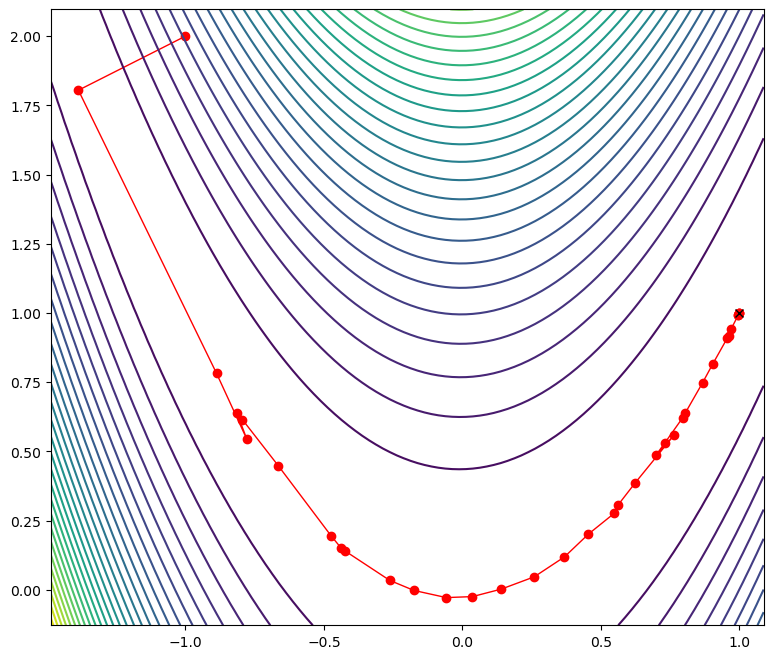

In [40]:
pathplot(f_Rosenbrock,xlist_ILS, showmin=True, m=[1,1])